In [13]:
from tf_keras_vis.activation_maximization import ActivationMaximization
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.random import uniform

In [32]:
model =  load_model('/Users/luizeduardosantos/Documents/Turing/Interpretando-CNNs/model2_files/')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [15]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
 
replace2linear = ReplaceToLinear()

In [27]:
from tf_keras_vis.utils.scores import CategoricalScore
scores = CategoricalScore([0,1,2])
image_titles = ["Storm", "Yoda", "Darth"] #CORRIGIR
seed_input = uniform((3, 256, 256, 3), 0, 255)

In [28]:
from tf_keras_vis.activation_maximization import ActivationMaximization
 
activation_maximization = ActivationMaximization(model,
                                                 model_modifier=replace2linear,
                                                 clone=True)

In [29]:
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger
activations = activation_maximization(scores, steps = 400,
                                      seed_input=seed_input,
                                      callbacks=[Progress()])

400/400 [==============================] - 155s 388ms/step - Score: 8816.3652 - TotalVariation2D: 14.1080 - Norm: 33.4570


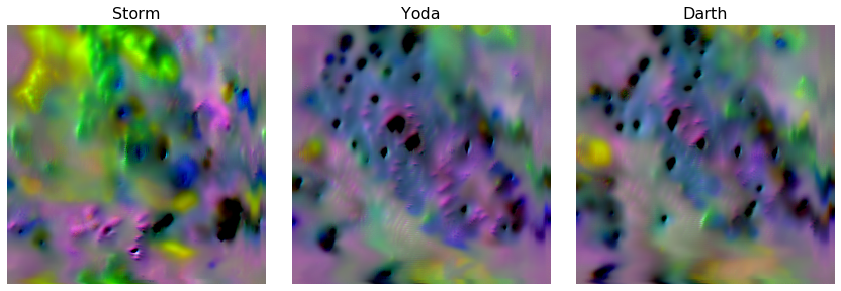

In [30]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(activations[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()